@Author: Pooja
@Date: 13-11-24
@Last modified by: Pooja
@Last modified Date: 13-11-2024
@Title: Logistic Regression to Predict Subscription to Term Deposit

importing libraries and dataset

In [182]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
df = pd.read_csv('bank.csv', sep=';')  
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


checking dataset for handling missing values

In [183]:
# print(df.isnull().sum())
# print(df.describe())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


checking for outliers

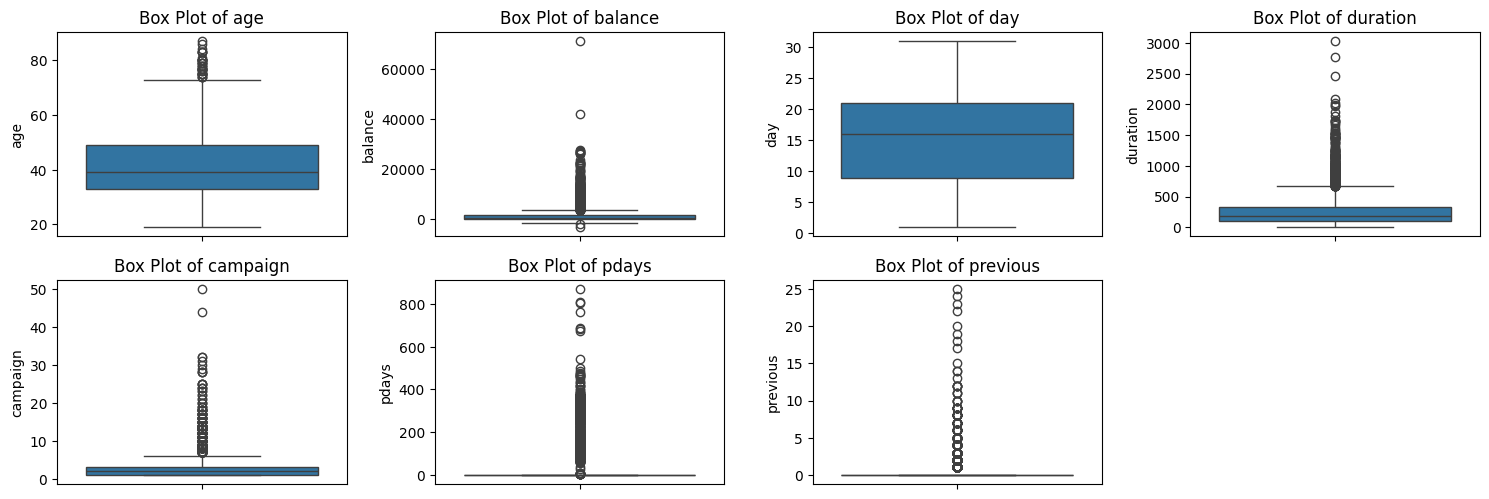

In [184]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()        # Select only numerical columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()

plt.show()

removing outliers

In [185]:
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the data to remove outliers
df_filtered = df[~((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)]

# Display the shape of the original and filtered data
print(f'Original data shape: {df.shape}')
print(f'Filtered data shape: {df_filtered.shape}')

Original data shape: (4521, 17)
Filtered data shape: (2803, 17)


after removing outliers

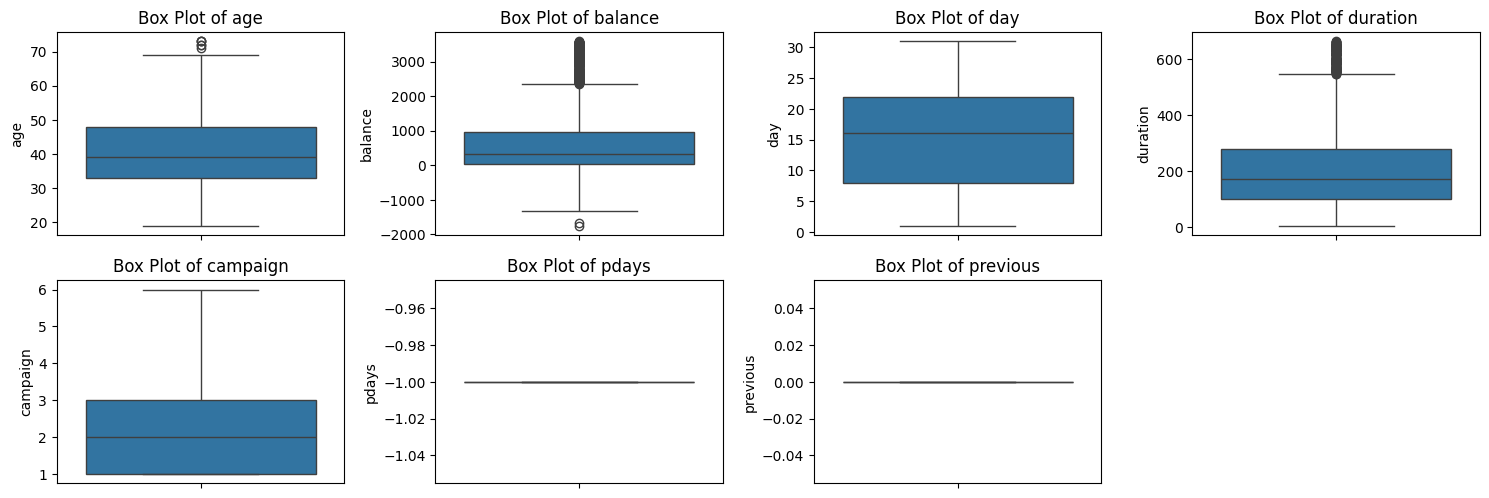

In [186]:
numeric_columns = df_filtered.select_dtypes(include=[np.number]).columns.tolist()      # Select only numerical columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df_filtered[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

handling cstegorical data using Label encoding

In [ ]:
# Identify categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Initialize label encoder


le = LabelEncoder()
# Apply label encoding to each categorical column
for column in categorical_columns:
    df_filtered[column] = le.fit_transform(df_filtered[column])

print(df_filtered)

      age  job  marital  education  default  balance  housing  loan  contact  \
0      30   10        1          0        0     1787        0     0        0   
3      30    4        1          2        0     1476        1     1        2   
4      59    1        1          1        0        0        1     0        2   
7      39    9        1          1        0      147        1     0        0   
8      41    2        1          2        0      221        1     0        2   
...   ...  ...      ...        ...      ...      ...      ...   ...      ...   
4510   36    9        0          1        0      566        1     0        2   
4512   40    1        1          1        0     1100        1     0        2   
4513   49    1        1          1        0      322        0     0        0   
4515   32    7        2          1        0      473        1     0        0   
4516   33    7        1          1        0     -333        1     0        0   

      day  month  duration  campaign  p

C:\Users\pooja konduri\AppData\Local\Temp\ipykernel_27536\1038278563.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column] = le.fit_transform(df_filtered[column])
C:\Users\pooja konduri\AppData\Local\Temp\ipykernel_27536\1038278563.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column] = le.fit_transform(df_filtered[column])
C:\Users\pooja konduri\AppData\Local\Temp\ipykernel_27536\1038278563.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

seperate target variable and features

In [197]:
X = df_filtered.drop('y', axis=1)
y = df_filtered['y'].map({'yes': 1, 'no': 0}) 


split for train and test data and perform feature scaling (standardization)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the already-fitted scaler
X_test_scaled = scaler.transform(X_test)

print("First 5 rows of standardized X_train:\n", X_train_scaled[:5])

First 5 rows of standardized X_train:
 [[ 0.82740975  1.36642517 -0.23570951  1.05536361 -0.14969136 -0.13103259
   0.88523238 -0.44557143 -0.82134267 -1.53436318  0.50146183 -0.39344621
  -0.13979358  0.          0.          0.        ]
 [ 0.92743303 -1.06030141 -1.90524766 -1.63026986 -0.14969136 -0.734117
  -1.12964689  2.24430904 -0.82134267 -0.69198455 -0.19189131  1.06799016
   2.85774753  0.          0.          0.        ]
 [-0.8729861   1.36642517  1.43382863 -0.28745312 -0.14969136 -0.68998887
  -1.12964689 -0.44557143 -0.82134267  0.3910737  -1.5785976  -0.36650729
  -0.13979358  0.          0.          0.        ]
 [-1.27307925 -1.06030141 -0.23570951 -0.28745312 -0.14969136  0.77642275
   0.88523238 -0.44557143 -0.82134267 -0.09028552  0.8481384   0.21267947
  -0.88917886  0.          0.          0.        ]
 [-0.77296282 -1.36364223  1.43382863  1.05536361 -0.14969136 -0.02014653
  -1.12964689 -0.44557143 -0.82134267 -0.93266416 -0.19189131  0.04431123
  -0.88917886  0.  

create and train Model

In [203]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [204]:
y_pred = model.predict(X_test_scaled)

Model Evaluation

Accuracy: 0.9512485136741974
Confusion Matrix:
 [[797   2]
 [ 39   3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       799
           1       0.60      0.07      0.13        42

    accuracy                           0.95       841
   macro avg       0.78      0.53      0.55       841
weighted avg       0.94      0.95      0.93       841



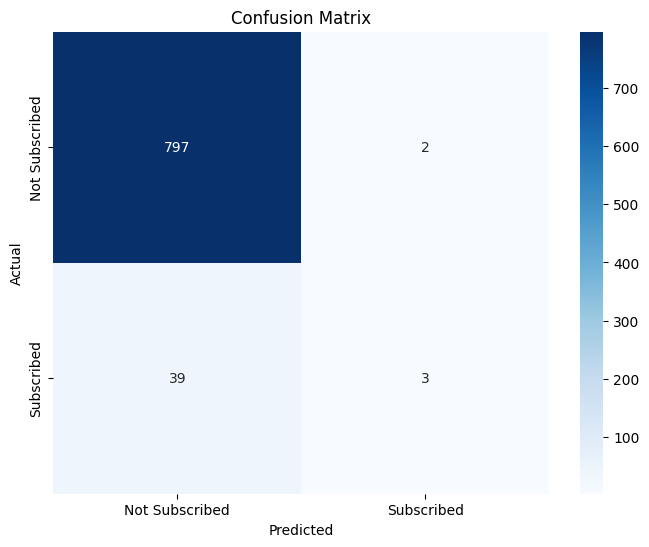

In [205]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

                            # Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Subscribed', 'Subscribed'], yticklabels=['Not Subscribed', 'Subscribed'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()